<a href="https://colab.research.google.com/github/ankitog/Deep-learning-Repo/blob/master/LeNet_network_with_MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
from torchvision import datasets, transforms
1import torchvision

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
trainset = datasets.MNIST(root='./data', train = True, download=True, transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

In [0]:
inputs, labels = iter(trainloader).next()

In [0]:
inputs.size()

torch.Size([128, 1, 28, 28])

In [0]:
img = inputs[0]
img = img.numpy()

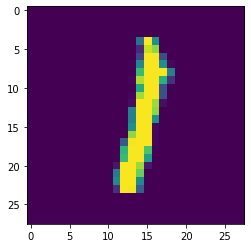

In [0]:
plt.imshow(img.squeeze())

In [0]:
def imshow(img):
  #img = img.numpy().squeeze()
  #img = img.view(28, -1).numpy()
  img = np.transpose(img.numpy(), (1, 2, 0))
  plt.imshow(img)

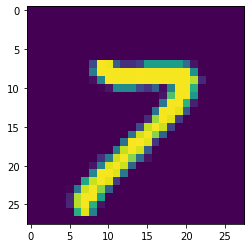

In [0]:
imshow(data[4])

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784, 128)
    self.hidden2 =nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)

  def forward(self, x):
    x = f.relu(self.hidden1(x))
    x = f.relu(self.hidden2(x))
    x = F.softmax(self.output(x),dim = 1)
    return x

model = Network()

In [0]:
class FirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 16, 3) #(16, 1, 28, 28) # (16, 16, 26, 26)

  def forward(self, x):
    x =  self.conv1(x)
    return x

cnnModel = FirstCNN()

In [0]:
data.size()


torch.Size([16, 1, 28, 28])

In [0]:
class LenNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.cnn = nn.Sequential(
        nn.Conv2d(1, 6, 5),      #(16, 1,28, 28) # (16, 6, 24, 24)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),  #(16, 6, 24, 24)  # (16, 6, 12, 12)
        nn.Conv2d(6, 16, 5),      ## (16, 6, 12, 12) # (16, 16, 8, 8)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
        )

    self.fcc = nn.Sequential(
        nn.Linear(256, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
        )
    
  def forward(self, x):
    #print(x.shape)
    x = self.cnn(x)
    #print(x.shape)
    x = x.view(x.size(0), -1)
    x = self.fcc(x)
    #print(x.shape)
    return x



In [0]:
model = LenNet()

In [0]:
out = model(inputs)
print(out)

tensor([[-2.4135,  0.0388,  2.6298,  ..., -1.1690,  1.8046, -0.6246],
        [ 0.9704,  1.0344,  0.9606,  ..., -7.4798,  2.9357, -3.4376],
        [-1.0459, -2.0556,  1.5344,  ..., -3.7113,  4.9505, -0.0223],
        ...,
        [ 1.2737, -3.5823,  4.4080,  ...,  0.4144, -2.5724, -2.5341],
        [-0.7152, -2.4107,  0.8196,  ...,  9.6436, -0.7659,  2.7242],
        [-6.2762,  8.3880,  0.1794,  ..., -0.6693,  1.2478, -0.7658]],
       grad_fn=<AddmmBackward>)


In [0]:
value, pred = torch.max(out.data, 1)
pred

tensor([3, 6, 8, 3, 8, 6, 3, 7, 4, 5, 5, 8, 0, 1, 4, 1, 1, 7, 4, 8, 6, 9, 7, 0,
        1, 2, 5, 6, 4, 5, 0, 6, 0, 9, 6, 8, 2, 3, 5, 3, 2, 8, 0, 0, 4, 9, 4, 3,
        1, 6, 3, 2, 1, 0, 3, 2, 4, 0, 5, 0, 4, 3, 7, 5, 9, 8, 4, 7, 2, 8, 5, 0,
        1, 2, 1, 7, 6, 8, 6, 7, 7, 9, 7, 3, 4, 1, 1, 8, 0, 3, 4, 5, 8, 0, 0, 7,
        2, 9, 9, 9, 9, 3, 1, 0, 5, 7, 1, 8, 2, 3, 9, 8, 8, 3, 5, 7, 3, 4, 1, 4,
        5, 4, 5, 5, 3, 4, 7, 1])

tensor([3, 6, 8, 3, 8, 6, 3, 7, 4, 5, 5, 8, 0, 1, 4, 1, 1, 7, 4, 8, 6, 9, 7, 0,
        1, 2, 5, 6, 4, 5, 0, 6, 0, 9, 6, 8, 2, 3, 5, 3, 2, 2, 0, 0, 4, 9, 4, 3,
        1, 6, 3, 2, 1, 0, 3, 2, 4, 0, 5, 0, 4, 3, 7, 5, 9, 8, 4, 1, 2, 8, 5, 0,
        1, 2, 1, 7, 6, 8, 6, 7, 7, 9, 7, 3, 4, 1, 1, 8, 0, 3, 4, 5, 8, 0, 0, 7,
        2, 9, 9, 9, 9, 3, 1, 0, 5, 7, 1, 8, 2, 3, 9, 8, 8, 3, 5, 7, 3, 4, 1, 4,
        5, 4, 5, 3, 3, 2, 7, 1])

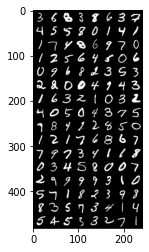

In [0]:
imshow(torchvision.utils.make_grid(inputs))
#print(' '.join(str(label[j].item()) for j in range(16)))
labels

In [0]:
batch_size = 128
trainset = datasets.MNIST(root='./data', train = True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = datasets.MNIST(root='./data', train = False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)


In [0]:
def evaluation(model, dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
    return 100 * correct / total



In [0]:
model = LenNet()
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters())

In [0]:
evaluation(model, trainloader)

12.5

In [0]:
%%time
max_epochs = 2

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs, labels

        opt.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/2
Epoch: 1/2
CPU times: user 31 s, sys: 500 ms, total: 31.5 s
Wall time: 31.7 s


In [0]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(model, testloader), evaluation(model, trainloader)))

Test acc: 98.44, Train acc: 97.66


In [0]:
print(model.state_dict())

In [0]:
checkpoint = {'input_size': 784,
              'hidden_size': [128, 64],
              'output_size': 10,
              'state_dict': model.state_dict()}

In [0]:
torch.load('check.pt')